<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: Team 9

Member: Tatsuki Ishizaki, Stefano Compagnone, Veronica Hurtado, Mifue Hama

In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling

file = 'housing_feature_rich.xlsx'
# reading the file into Python
housing = pd.read_excel(io = file, header = 0)
housing.head()

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Sale_Price,...,Gilbert,Mitchel,NAmes,NWAmes,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Other_NH
0,1,31770,112,1080,1656,0,1656,528,272,215000,...,0,0,1,0,0,0,0,0,0,0
1,2,11622,0,882,896,0,896,730,260,105000,...,0,0,1,0,0,0,0,0,0,0
2,3,14267,108,1329,1329,0,1329,312,429,172000,...,0,0,1,0,0,0,0,0,0,0
3,4,11160,0,2110,2110,0,2110,522,0,244000,...,0,0,1,0,0,0,0,0,0,0
4,5,13830,0,928,928,701,1629,482,246,189900,...,1,0,0,0,0,0,0,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
<strong>a)</strong> Write a hypothesis on the effect you believe each new feature will have on the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>) in a markdown cell. (minimum 3 sentences per feature)
<br><br>
<strong>b)</strong> Give a practical, real world explanation as to why do you feel the new feature adds value. (minimum of 2 sentences per feature)

**1) Total_Square_Foot (Total Usable Area)**

a) 
 There is a hypothesis that the Total_Square_Foot, which is the sum of the living area, basement area, garage area, and porch area, has a significant positive impact on the property's sale price. This hypothesis is based on the understanding that the overall usable area of a house is a primary factor determining its value. The Total_Square_Foot metric encompasses the comprehensive space available for living, storage, parking, and outdoor enjoyment, all of which are important aspects considered by buyers. A positive correlation between the total area and the sale price is expected, reflecting the general trend of preference for more spacious homes. The larger the total area, the better the functionality and comfort, generally leading to an increase in the property's market value.


b)
Total_Square_Foot allows for a holistic grasp of the scale of real estate. Firstly, it provides a clear and comprehensive measurement of the property's space, including not just the living area but also crucial areas like the basement, garage, and porch. This total reflects the amount of usable space, which often tops the list of priorities for buyers due to its impact on the functionality and potential of the property. Furthermore, generally, the higher the Total_Square_Foot, the more space there is to accommodate a variety of activities and needs, making the property attractive to a broad range of buyers. For example, a spacious basement can be used as a recreational area, home office, or gym, and a large garage as ample storage space or a workshop (Orchard,2023). Such versatility meets the diverse preferences and lifestyles of potential buyers, making properties with a high Total_Square_Foot more desirable and consequently enhancing their value in the market, thus creating significant added value.


**2) Quality_Living_Area_Index**

a) 
The Quality_Living_Area_Index, a metric that multiplies the overall quality of materials and finishes by the size of the living area, is assumed to have a positive correlation with both Sale Price and log Sale Price. This hypothesis stems from the presumption that homes with larger living spaces and higher-quality finishes are more desirable to buyers and tend to hold higher value, consequently trading at higher prices in the real estate market. The larger and higher-quality living spaces directly contribute to the appeal and functionality of a property, thereby increasing its market value. For the log_Sale_Price, which adjusts for the nonlinearity of real estate prices, the Quality_Living_Area_Index is expected to show a strong positive correlation, reflecting the exponential increase in value that high-quality and spacious living spaces bring to a property.


b)
 The Quality_Living_Area_Index adds tangible value in the real-world real estate context for several reasons. Firstly, it quantifies the intuitive appeal of a property's living space, providing a composite measure that captures both the size and quality of the most critical area of a house. Buyers often prioritize the living area when evaluating properties because it's where most time is spent and where guests are entertained. A higher index indicates not just sufficient space, but also a property that is enhanced with quality finishes and craftsmanship that elevate the living experience. Secondly, this index serves as a nuanced indicator that can differentiate properties in a crowded market. Even when many homes offer similar living spaces, the quality of finishes can vary greatly, affecting the overall allure and value of the property. By incorporating both size and quality into a single metric, the Living Area Index helps both buyers and sellers alike understand the premium attached to well-crafted and spacious homes(Gomez, 2022).

**3) Garage_Index（Total Garage Capacity）**

a) 
The Garage_Index, which is calculated by multiplying the garage area by the number of cars it can accommodate, is hypothesized to have a significant positive impact on both the Sale Price and the log Sale Price of a property. This expectation is based on the notion that in regions of America where car ownership is high, a larger garage that can house more vehicles directly contributes to the practicality and appeal of a property. The positive correlation with Sale_Price is expected to reflect the premium that buyers are willing to pay for homes that offer spacious and multifunctional garage facilities, and it is anticipated to be robust.


b) 
The Garage_Index serves as a clear and quantifiable indicator of the overall capacity and utility of a garage. It directly addresses the practical needs of buyers who own multiple vehicles or require significant storage space, providing a straightforward way to assess the suitability and attractiveness of a garage. The higher the Garage_Index, the more vehicles it can accommodate, and the more likely it is to support other uses such as a workshop, storage area, or hobby space, adding to the property's appeal. A property with a high Garage_Index is thus valued for its versatility, enhancing its attractiveness in the real estate market (Knoxville, n.d.).


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cell below to develop the features you have hypothesized.

C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


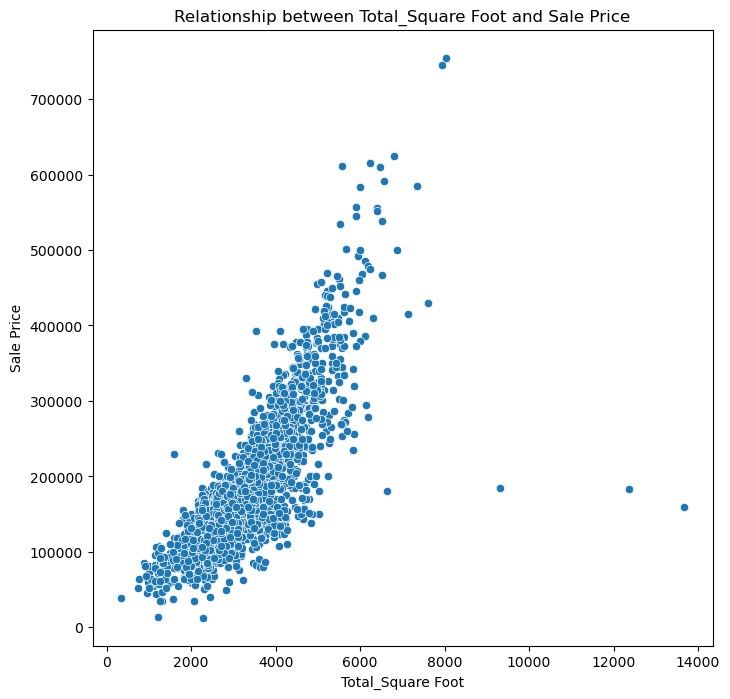

C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


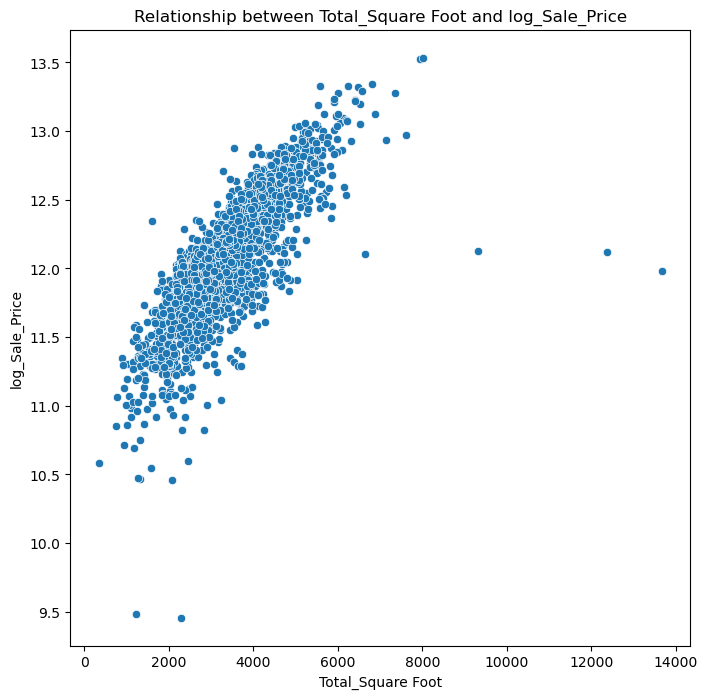


-------------------------------------------
Total_Square Foot Correlations
-------------------------------------------
               Sale_Price  log_Sale_Price
Total_SF             0.82            0.81
Gr_Liv_Area          0.71            0.70
Total_Bsmt_SF        0.63            0.63
Garage_Area          0.64            0.65
Porch_Area           0.38            0.39




In [2]:
## Feature 1 ##
# Total_Square Foot
housing['Total_SF'] = housing['Total_Bsmt_SF'] + housing['Gr_Liv_Area'] + housing['Garage_Area'] + housing['Porch_Area']

# setting figure size
fig, ax = plt.subplots(figsize = (8, 8))

# developing a scatterplot
sns.scatterplot(x    = 'Total_SF', y    = 'Sale_Price', data = housing)

# titles and labels
plt.title(label   = 'Relationship between Total_Square Foot and Sale Price')
plt.xlabel(xlabel = 'Total_Square Foot')
plt.ylabel(ylabel = 'Sale Price')

# displaying the plot
plt.tight_layout
plt.show()



# setting figure size
fig, ax = plt.subplots(figsize = (8, 8))

# developing a scatterplot
sns.scatterplot(x    = 'Total_SF', y    = 'log_Sale_Price', data = housing)

# titles and labels
plt.title(label   = 'Relationship between Total_Square Foot and log_Sale_Price')
plt.xlabel(xlabel = 'Total_Square Foot')
plt.ylabel(ylabel = 'log_Sale_Price')

# displaying the plot
plt.tight_layout
plt.show()



# developing a correlation matrix
Total_SF_corr = housing.loc[ : , ['Total_SF','Gr_Liv_Area','Total_Bsmt_SF',
                                  'Garage_Area','Porch_Area', 'Sale_Price','log_Sale_Price']  ].corr(method = 'pearson').round(decimals = 2)

# printing orrelations Total_Square Foot
print(f"""
-------------------------------------------
Total_Square Foot Correlations
-------------------------------------------
{Total_SF_corr.loc[['Total_SF','Gr_Liv_Area','Total_Bsmt_SF','Garage_Area','Porch_Area'],['Sale_Price','log_Sale_Price']]}

""")

<br>

C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


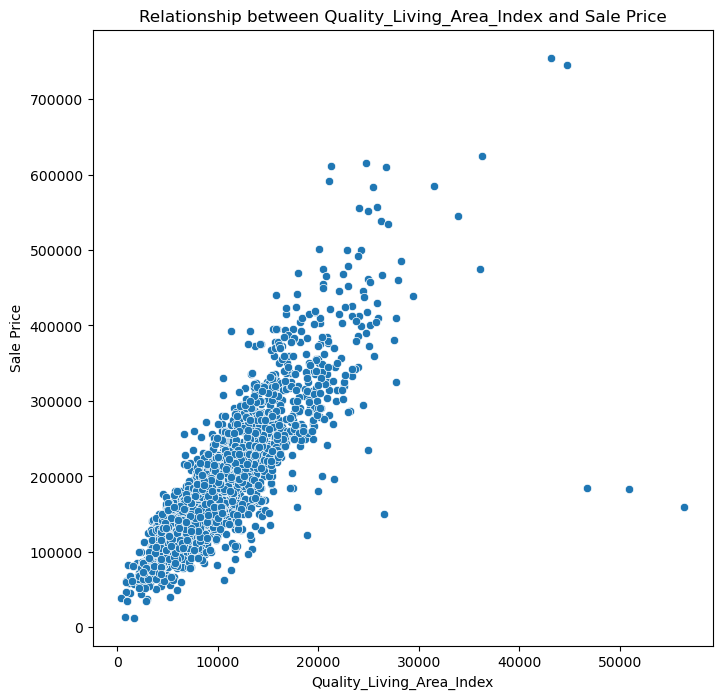

C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


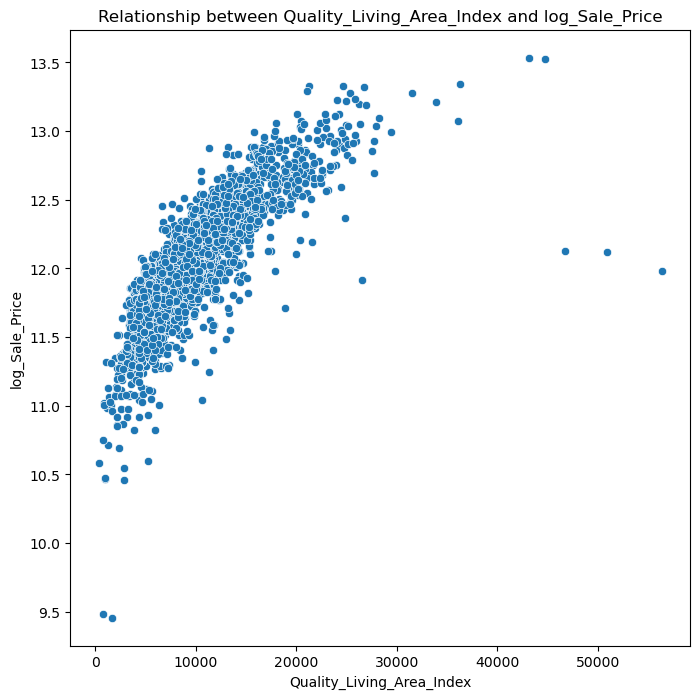


------------------------------------------------------
Quality_Living_Area_Index Correlations
------------------------------------------------------
                           Sale_Price  log_Sale_Price
Quality_Living_Area_Index        0.85            0.81
Gr_Liv_Area                      0.71            0.70
Overall_Qual                     0.80            0.83




In [3]:
## Feature 2 ##
# Quality_Living_Area_Index
housing['Quality_Living_Area_Index'] = housing['Gr_Liv_Area'] * housing['Overall_Qual'] 


# setting figure size
fig, ax = plt.subplots(figsize = (8, 8))

# developing a scatterplot
sns.scatterplot(x    = 'Quality_Living_Area_Index', y    = 'Sale_Price', data = housing)

# titles and labels
plt.title(label   = 'Relationship between Quality_Living_Area_Index and Sale Price')
plt.xlabel(xlabel = 'Quality_Living_Area_Index')
plt.ylabel(ylabel = 'Sale Price')

# displaying the plot
plt.tight_layout
plt.show()


# setting figure size
fig, ax = plt.subplots(figsize = (8, 8))

# developing a scatterplot
sns.scatterplot(x    = 'Quality_Living_Area_Index', y    = 'log_Sale_Price', data = housing)

# titles and labels
plt.title(label   = 'Relationship between Quality_Living_Area_Index and log_Sale_Price')
plt.xlabel(xlabel = 'Quality_Living_Area_Index')
plt.ylabel(ylabel = 'log_Sale_Price')

# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
Quality_Living_Area_Index_corr = housing.loc[ : , ['Quality_Living_Area_Index','Gr_Liv_Area','Overall_Qual','Sale_Price','log_Sale_Price']].corr(method = 'pearson').round(decimals = 2)

# printing orrelations Quality_Living_Area_Index
print(f"""
------------------------------------------------------
Quality_Living_Area_Index Correlations
------------------------------------------------------
{Quality_Living_Area_Index_corr.loc[['Quality_Living_Area_Index','Gr_Liv_Area','Overall_Qual'],['Sale_Price','log_Sale_Price']]}

""")


<br>

C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


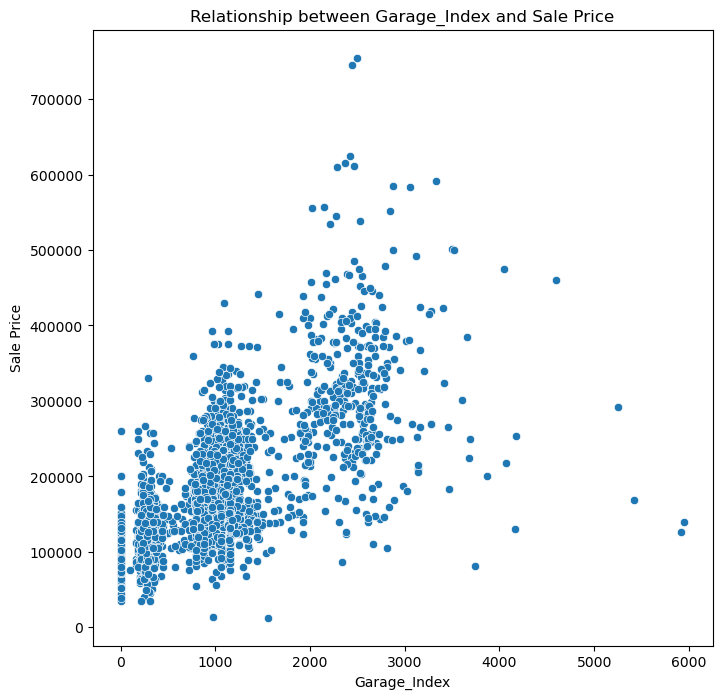

C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fmb10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


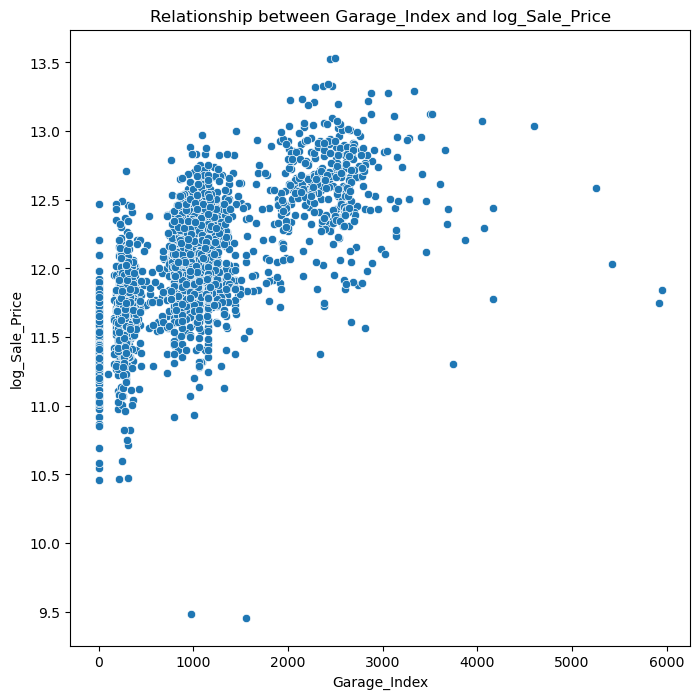


-------------------------------------------
Garage_Index Correlations
-------------------------------------------
              Sale_Price  log_Sale_Price
Garage_Index        0.68            0.66
Garage_Area         0.64            0.65
Garage_Cars         0.65            0.67




In [4]:
## Feature 3 ##
# Garage_Index
housing['Garage_Index'] = housing['Garage_Area'] * housing['Garage_Cars'] 


# setting figure size
fig, ax = plt.subplots(figsize = (8, 8))

# developing a scatterplot
sns.scatterplot(x    = 'Garage_Index', y    = 'Sale_Price', data = housing)

# titles and labels
plt.title(label   = 'Relationship between Garage_Index and Sale Price')
plt.xlabel(xlabel = 'Garage_Index')
plt.ylabel(ylabel = 'Sale Price')

# displaying the plot
plt.tight_layout
plt.show()


# setting figure size
fig, ax = plt.subplots(figsize = (8, 8))

# developing a scatterplot
sns.scatterplot(x    = 'Garage_Index', y    = 'log_Sale_Price', data = housing)

# titles and labels
plt.title(label   = 'Relationship between Garage_Index and log_Sale_Price')
plt.xlabel(xlabel = 'Garage_Index')
plt.ylabel(ylabel = 'log_Sale_Price')

# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
Garage_Index_corr = housing.loc[ : , ['Garage_Index','Garage_Area','Garage_Cars','Sale_Price','log_Sale_Price']].corr(method = 'pearson').round(decimals = 2)

# printing orrelations Garage_Index
print(f"""
-------------------------------------------
Garage_Index Correlations
-------------------------------------------
{Garage_Index_corr.loc[['Garage_Index','Garage_Area','Garage_Cars'],['Sale_Price','log_Sale_Price']]}

""")


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop a correlation matrix or a heatmap to show the linear relationships between your five new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

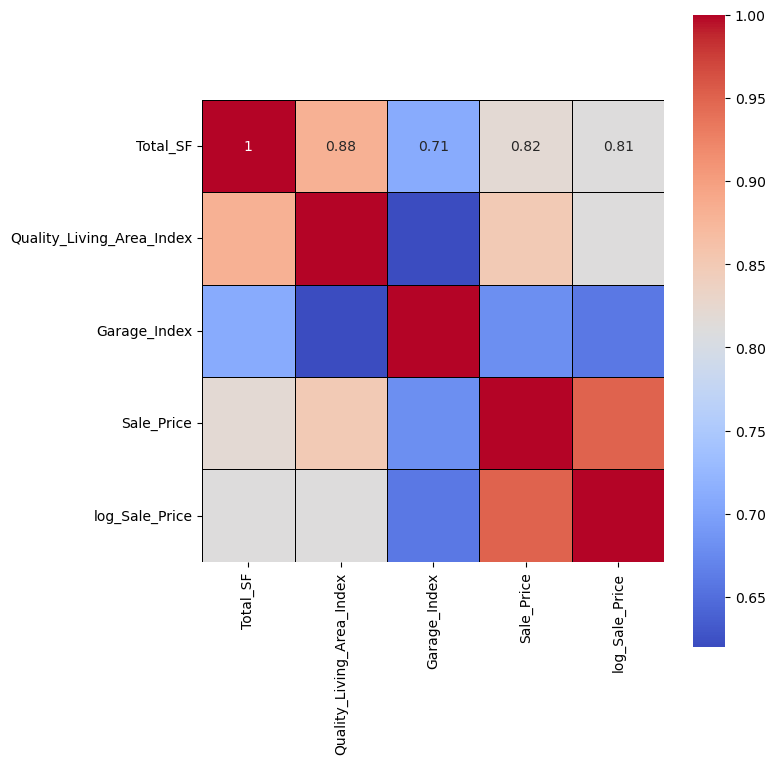

In [5]:
# Creating a heat map
# instantiating a correlation matrix
df_corr = housing[['Total_SF', 'Quality_Living_Area_Index', 'Garage_Index', 'Sale_Price', 'log_Sale_Price']].corr().round(2)

# setting figure size
fig, ax = plt.subplots(figsize=(8,8))

# visualizing the correlation matrix
sns.heatmap(df_corr, cmap = 'coolwarm', square = True, annot = True, linecolor = 'black', linewidths = 0.5)

# layout and rendering
plt.tight_layout()
plt.show()

In [6]:
# building a fit model
lm_full = smf.ols(formula = """Sale_Price ~ Total_SF + Quality_Living_Area_Index + Garage_Index""", data = housing)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     3134.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:45:51   Log-Likelihood:                -35125.
No. Observations:                2930   AIC:                         7.026e+04
Df Residuals:                    2926   BIC:                         7.028e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.772e+04   2871.607      9.652      0.000    2.21e+04    3.33e+04
Total_SF                     14.4464      1.657      8.718      0.000      11.197      17.695
Quality_Living_Area_Index     8.8424      0.302     29.288      0.000       8.250       9.434
Garage_Index                 22.7833      1.393     16.361      0.000      20.053      25.514
==============================================================================
Omnibus:                     2070.838   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262694.067
Skew:                          -2.479   Prob(JB):                         0.00
Kurtosis:                      49.121   Cond. No.                     4.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Result of Regression model**

The Adjusted R-squared value is 0.762, which suggests a relatively good fit, indicating that the model has a reasonable predictive ability for actual data. Since the P-values for each predictor variable are below 0.05, we can say that they are statistically significant. In the comparison of coefficients, the Garage_Index coefficient is the highest, followed by Total_SF (Total Usable Area), and then the Quality_Living_Area_Index. The coefficients are 22.7833 for Garage_Index, 14.4464 for Total_SF, and 8.8424 for Quality_Living_Area_Index. This indicates that among the predictor variables, Garage_Index has the strongest positive effect on Sale Price, followed by Total_SF and Quality_Living_Area_Index in that order.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
Did each engineered feature perform as expected? Why or why not? (minimum of 2 sentences per engineered feature)

**1) Total_Square_Foot (Total Usable Area)**

Total_Square_Foot shows a correlation coefficient of 0.82 with Sale Price. This represents a very strong positive correlation, meaning that the larger the total usable area, the higher the tendency for the sale price to be. Total_Square Foot has the highest correlation with Sale Price when compared to its components: Gr_Liv_Area (0.71), Total_Bsmt_SF (0.63), Garage_Area (0.64), and Porch_Area (0.38). This suggests that summing the sizes of these individual spaces provides a more powerful indicator for predicting the sale price. The correlation coefficient of 0.82 for Total_Square_Foot with Sale Price is slightly higher than the 0.81 correlation with Log Sale Price. This implies that the impact of total area on the absolute value of the sale price is stronger than after logarithmic transformation of the price, and it may particularly mean that the influence of area on price is more pronounced in more expensive properties. The data points on the scatterplot create an upward trending pattern, visually indicating that larger areas are associated with higher sale prices. Also, properties with a very large Total_Square_Foot are observed to show exceptionally high values in price.

**2) Quality_Living_Area_Index**

The Quality_Living_Area_Index has a correlation coefficient of 0.85 with Sale Price. This indicates a very strong positive correlation, implying that the higher the quality and size of the living area, the greater the increase in sale price. The Quality_Living_Area_Index shows a higher correlation with Sale Price than its components, Gr_Liv_Area (0.71) and Overall_Qual (0.80), suggesting that combining the size and quality of the living area creates a more potent indicator for price prediction. The correlation coefficient with Sale Price is 0.85, which is slightly higher than the 0.81 correlation with Log Sale Price. This suggests that the impact of the Quality_Living_Area_Index on the absolute value of the sale price is marginally stronger than its logarithmic transformation effect. The data display an upward trend, and it is visually apparent that properties with a high Quality_Living_Area_Index are sold at very high prices. However, some outliers are also visible in the plot, where a few properties with a low Quality_Living_Area_Index have very high Sale Prices, indicating that other factors might have a significant impact on the price.

**3) Garage_Index（Total Garage Capacity）**


The Garage_Index has a correlation coefficient of 0.68 with Sale Price. This represents a moderately strong positive relationship, suggesting that as the index, which combines garage area and the capacity to hold a number of cars, increases, the sale price tends to rise as well. The correlation of Garage_Index with Sale Price is higher than the correlation of its individual components, Garage_Area (0.64) and Garage_Cars (0.65). This indicates that this engineered feature, which merges these two elements, is a better predictor of sale price than each element on its own. The combination likely captures the overall utility and value of a garage more comprehensively. The correlation of Garage_Index with Sale Price (0.68) is slightly higher than its correlation with log_Sale_Price (0.66), suggesting that the absolute sale price more directly reflects the value of the Garage_Index. The spread of data points indicates a positive trend, while also hinting at the presence of other variables or factors that affect sale price, which are not captured by the Garage_Index alone.

References: 
    
Gomez, J. (2022, June 3). Opendoor | Sell your home the minute you’re ready. Opendoor.com. https://www.opendoor.com/articles/factors-that-influence-home-value
    
How To Know if Your Machine Learning Model Has Good Performance | Obviously AI. (n.d.). Www.obviously.ai. https://www.obviously.ai/post/machine-learning-model-performance#:~:text=But%20in%20our%20opinion%2C%20anything
    
Knoxville, G. B. (n.d.). Garage Size and Property Value. Garage Builder Knoxville. Retrieved February 8, 2024, from https://garagebuilderknoxville.com/garage-size-and-property-value/
    
Vadakkanmarveettil, J. (2015, July 30). Sensitivity vs. Specificity in Logistic Regression. UNext. https://u-next.com/blogs/business-analytics/sensitivity-vs-specificity-in-logistic-regression/#:~:text=Sensitivity%20(also%20called%20the%20true